In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/ColabData

Mounted at /content/drive
/content/drive/My Drive/ColabData


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [5]:
!pip install langchain-text-splitters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


### Loading the Documents

In [6]:
# Loading the data as corpus_root
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/content/drive/MyDrive/ColabData/ceo-letters-shareholders/.' # Modify for your own google drive
# Comment the above variable corupus_root if not running from Google Drive and
# Uncomment below if running locally
# corpus_root = .'/data/ceo-letters-shareholders/.'

### Splitting the Documents

**Bertopic** works best for either sentences or paragraphs. This means that whenever we have a set of documents, where each documents contains several paragraphs, the document is truncated and the topic model is only trained on a small part of the data.

Since we are dealing documents that may have multiple paragraphs, we will be splitting each document into chunks (approximately 1000 each). We will use **Langchain** textsplitter for this

In [7]:
import os
import pandas as pd
from langchain_text_splitters import SpacyTextSplitter

# Directory containing the .txt files
# directory = "."

# Initialize the text splitter with the desired configuration
text_splitter = SpacyTextSplitter(chunk_size=1000)

# Prepare to collect data in a list
data = []

# Loop through each file in the directory
for filename in os.listdir(corpus_root):
    if filename.endswith(".txt"):
        # Full path to the file
        file_path = os.path.join(corpus_root, filename)

        # Read the file content
        with open(file_path, 'r') as file:
            doc = file.read()

        # Create documents (chunks) from the file content
        texts = text_splitter.create_documents([doc])

        # Filter and collect chunks with a sufficient number of words
        for text in texts:
            if len(text.page_content.split()) > 5:
                data.append({
                    'text': text.page_content,
                    'filename': filename
                })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data, columns=['text', 'filename'])

# Display the DataFrame structure
print(df.head())


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


                                                text  \
0  My fellow shareholders: Despite the well-known...   
1  Through our megaprojects in gasification, carb...   
2  Meanwhile, we returned more than $1.2 billion ...   
3  However, our goal, as always, remains zero acc...   
4  Making Our Dream a Reality Air Products’ goal ...   

                                  filename  
0  Air Products Chemicals_Ghasemi_2021.txt  
1  Air Products Chemicals_Ghasemi_2021.txt  
2  Air Products Chemicals_Ghasemi_2021.txt  
3  Air Products Chemicals_Ghasemi_2021.txt  
4  Air Products Chemicals_Ghasemi_2021.txt  


In [8]:
# Size of dataframe generated
df.shape

(5279, 2)

In [9]:
# Viewing the first 5 rows
df.head()

,text,filename
0,My fellow shareholders: Despite the well-known...,Air Products Chemicals_Ghasemi_2021.txt
1,"Through our megaprojects in gasification, carb...",Air Products Chemicals_Ghasemi_2021.txt
2,"Meanwhile, we returned more than $1.2 billion ...",Air Products Chemicals_Ghasemi_2021.txt
3,"However, our goal, as always, remains zero acc...",Air Products Chemicals_Ghasemi_2021.txt
4,Making Our Dream a Reality Air Products’ goal ...,Air Products Chemicals_Ghasemi_2021.txt


### Topic Modeling using Bertopic

We're using BERTopic to understand the main topics discussed in the collection of letters that we loaded. This will break down the text into different topics or themes, making it easier for us to understand what the documents are about.

In [10]:
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
letter_topics, _ = model.fit_transform(df.text)

2024-05-01 19:21:00,765 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/165 [00:00<?, ?it/s]

2024-05-01 19:24:09,097 - BERTopic - Embedding - Completed ✓
2024-05-01 19:24:09,100 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-01 19:24:50,791 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:24:50,794 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-01 19:24:51,096 - BERTopic - Cluster - Completed ✓
2024-05-01 19:24:51,110 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-01 19:24:53,407 - BERTopic - Representation - Completed ✓


CPU times: user 4min 10s, sys: 11.8 s, total: 4min 22s
Wall time: 4min 24s


In [11]:
# Obtaining information about the topics generated and storing it in variable freq
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 92


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2577,-1_and_our_to_we,"[and, our, to, we, the, in, of, for, with, that]","[Dear Shareowners,\n\nIn 2020, the COVID-19 pa..."
1,0,611,0_billion_cash_year_share,"[billion, cash, year, share, in, of, capital, ...",[2021 FINANCIAL HIGHLIGHTS In 2021 we delivere...
2,1,133,1_patients_disease_covid_treatment,"[patients, disease, covid, treatment, 19, the,...",[We are also exploring it as a potential treat...
3,2,127,2_diversity_inclusion_women_diverse,"[diversity, inclusion, women, diverse, represe...",[We also know how vital an inclusive and diver...
4,3,117,3_our_culture_we_and,"[our, culture, we, and, to, is, that, for, are...",[We have long admired their deep expertise and...


We can see that a total of 92 topics were generated by the model for the entire corpus of the documents.\
The column **Topic** gives us information about the topic number and maps it to the **Name** column where we can get more context or details of each topic.\
The **top -1** topic is typically assumed to be irrelevant, and it usually contains stop words like “*the*”, “*a*”, and “*and*”. We can perform additional cleansing by removing these stop words if we wish to not consider these words as part of the topic distributions.

Let us view a couple of topics more closely so we have a better idea of the model's output.

In [ ]:
a_topic = freq.iloc[6]["Topic"] # Select one topic
model.get_topic(a_topic)

[('pandemic', 0.016054699346897287),
 ('dear', 0.01298153738050101),
 ('was', 0.012616602837826266),
 ('shareholders', 0.011857573905894193),
 ('year', 0.011842569631786665),
 ('covid', 0.011701132429576442),
 ('19', 0.011434635169528822),
 ('the', 0.01131447479611702),
 ('2020', 0.010971004766048032),
 ('crisis', 0.010068055751845443)]



*   The topic appears to be related to the COVID-19 pandemic, as indicated by words like "pandemic," "COVID," "19," "crisis," and "2020".
*   Other keywords such as "dear," "shareholders," and "year" suggest discussions related to the impact of the pandemic on various aspects of life and business.
*   The term "shareholders" indicates potential discussions related to the economic impact of the pandemic on businesses and shareholders.

Overall, this topic appears to revolve around the COVID-19 pandemic, its effects on different aspects of society and business, and potentially discussions related to shareholder concerns and the challenges faced during the crisis year of 2020.





In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select one topic
model.get_topic(a_topic)

[('diversity', 0.02109161835633418),
 ('inclusion', 0.01564464705203315),
 ('black', 0.013972750518785576),
 ('women', 0.013559397646669167),
 ('diverse', 0.012578684463240848),
 ('equity', 0.010965890521254901),
 ('and', 0.010080333820105125),
 ('we', 0.009877575717989416),
 ('to', 0.009691561813205532),
 ('for', 0.009225207533728918)]

*   The topic appears to be related to diversity, inclusion, and equity, as indicated by words like "diversity," "inclusion," "diverse," "equity," and "women".
*   Terms such as "black" suggest discussions specifically related to racial diversity and inclusion.
*   The presence of common words like "and," "we," "to," and "for" may not contribute significantly to the topic's main theme but may be common in the documents.


This topic focuses on promoting inclusivity for Black women and ensuring their fair and just treatment. It relates to the company's culture and the diversity of its workforce.










#Visualization

Bertopic has in-built visualization capabilities which can help in getting a visual summary of the main topics in the dataset.It helps in understanding the distribution of topics and their relative importance and helps facilitate quick interpretation of the main themes represented by the topics.

**Barplots**

In [ ]:
model.visualize_barchart(top_n_topics=10,n_words=7)

**Intertopic Distance Map**

The Intertopic Distance Mappingis a visualization technique used to represent the relationship between topics in a two-dimensional space. It positions topics based on their semantic similarity or dissimilarity. Topics that are closely related or share similar keywords are placed closer together, while topics with different themes are placed farther apart.
For example, Topics 45 (45_visa_payments_digital_cards), 85 (85_bank_banking_accounts_consumer) and 100 (100_banks_companies_tech_competition) are clustered together indicating semantic similarity or related themes.

In [ ]:
model.visualize_topics()

**Heirarchcal Clustering**

We can see from the intertopic distance mapping that a lot of the topics are clustered together indicating that they may share similar themes. Heirarchical clustering groups them together and helps in reducing the number of topics and helps in understanding the topics relate to one another.

In [ ]:
model.visualize_hierarchy(top_n_topics=20)

We can see here that Topic 4 (4_emissions_carbon_climate_energy) and Topic 9 (9_energy_solar_wind) are grouped together. \
Also, Topic 4 (4_emissions_carbon_climate_energy), Topic 9 (9_energy_solar_wind) and Topic 14 (14_aircraft_defence_air) are grouped together.

#Drilling down to Years

So far, we have got a general idea of what themes or topics are spread across the entire corpus. However, we want to get more context on what themes were relevant for specific periods of time.\
In the next set of exercises, we will group the documents based on years they were written and try to see topics that were more relevant during those years.

**Loading the files**

In [12]:
# This function takes in input as filename pattern, chunks the data and generates a dataframe. We will create different datasets for different years
def create_df(file_pattern='.txt'):
  # Initialize the text splitter with the desired configuration
  text_splitter = SpacyTextSplitter(chunk_size=1000)

  # Prepare to collect data in a list
  data = []

  # Loop through each file in the directory
  for filename in os.listdir(corpus_root):
      if filename.endswith(file_pattern):
          # Full path to the file
          file_path = os.path.join(corpus_root, filename)

          # Read the file content
          with open(file_path, 'r') as file:
              print(file)
              doc = file.read()

          # Create documents (chunks) from the file content
          texts = text_splitter.create_documents([doc])

          # Filter and collect chunks with a sufficient number of words
          for text in texts:
              if len(text.page_content.split()) > 5:
                  data.append({
                      'text': text.page_content,
                      'filename': filename
                  })
  # print (data)
  # Convert the list of dictionaries to a DataFrame
  df = pd.DataFrame(data, columns=['text', 'filename'])

  # Display the DataFrame structure
  return df

In [13]:
df_2019 = create_df('_2019.txt')#Dataframe for year 2019
df_2020 = create_df('_2020.txt')#Dataframe for year 2020
df_2021 = create_df('_2021.txt')#Dataframe for year 2021
df_2022 = create_df('_2022.txt')#Dataframe for year 2022

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Apple_Cook_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Anixter International_Galvin_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Citizens Financial Group_Saun_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Ford Motor_Hackett_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./WEC Energy Group_Fletcher_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Westlake Chemical_Chao_2019.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Albertsons_Sankaran_2020.txt' mode='r' encodi

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Fox_Murdoch_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Fortive_Lico_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./HollyFrontier_Jennings_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Guardian Life Insurance Company of America_McMahon_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Interpublic Group_Krakowsky_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./International Paper_Sutton_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Howmet Aerospace_Plant_2020.t

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Macys_Gennette_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Liberty Media_Maffei_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Massachusetts Mutual Life Insurance_Crandall_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Magellan Health_Fasola_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Mosaic_ORourke_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Occidental Petroleum_Hollub_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Northrop Grumman_Warden_2020.txt' mo

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Packaging Corp. of America_Kowlzan_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Pioneer Natural Resources_Sheffield_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Qurate Retail_George_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./PVH_Larsson_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./PayPal Holdings_Schulman_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Principal Financial_Houston_2020.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Quanta Services_Austin_202

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./American Axle Manufacturing_Dauch_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Altria_Gifford_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Andersons_Bowe_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Aramark_Zillmer_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Amphenol_Norwitt_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Applied Materials_Dickerson_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Assurant_Demmings_2021.txt' mode='r' encoding='UTF-8'>
<_i

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./CMS Energy_Rochow_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Conagra Brands_Connolly_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Cigna_Cordani_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Commercial Metals_Smith_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Clorox_Rendle_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Charter Communications_Rutledge_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Corning_Weeks_2021.txt' mode='r' encoding='UTF-8'>
<_io.T

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Constellation Brands_Newlands_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Cisco_Robbins_2021.txt' mode='r' encoding='UTF-8'>


<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./CenterPoint Energy_Lesar_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Consolidated Edison_Cawley_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./ConocoPhillips_Lance_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./CDW_Leahy_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Colgate Palmolive_Wallace_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./DXC Technology_Salvino_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Delek US Holdings_Yemin_2021.txt' mode='r' encoding

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Dominion Energy_Blue_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Duke Energy_Good_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Dow_Fitterling_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Devon Energy_Muncrief_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Dollar General_Vasos_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Darden Restaurants_Lee_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Delta Airlines_Bastian_2021.txt' mode='r' encoding='UTF-8'>
<_io

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Marriott International_Capuano_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Manpower Group_Prising_2021.txt' mode='r' encoding='UTF-8'>


<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./L3Harris Technologies_Kubasik_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Lam Research_Archer_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Marathon Petroleum_Hennigan_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Marsh McLennan_Glaser_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Lockheed Martin_Taiclet_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Loews_Tisch_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Levi Strauss_ Bergh_2021.txt' mode='r' encoding

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Procter Gamble_Taylor_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./PPG Industries_McGarry_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Pulte Group_Marshall_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Performance Food Group_Holm_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Philip Morris International_Calantzopoulos_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./StoneX_OConnor_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Sempra Energy_Martin_2021.txt' 

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Science Applications International_Keene_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Tapestry_Crevoiserat_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./State Street_OHanley_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Sysco_Hourican_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./SP Global_Peterson_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Reinsurance Group of America_Manning_2021.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Raymond James Financial_Reill

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Analog Devices_Roche_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Ameren_Lyons_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Arthur J. Gallagher_Gallagher_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Boston Scientific_Mahoney_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Bank of America_Moynihan_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Baxter International_Almeida_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Berkshire Hathaway_Buffet_2022.txt' mod

<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Fortune Brands Home Security_Fink_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./EOG Resources_Yacob_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Genworth Financial_McInerney_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Fluor_Constable_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./First Energy_Misheff_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./General Electric_Culp_2022.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/drive/MyDrive/ColabData/ceo-letters-shareholders/./Illinois Tool Works_Santi_2022.txt' mode=

In [14]:
print(df_2019.shape)
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)

(66, 2)
(1061, 2)
(3177, 2)
(968, 2)


**Defining Model**

The below function takes in a dataframe as input, runs bertopic on the dataframe and returns the topics as output

In [15]:
%%time
from bertopic import BERTopic

def create_model(data_frame):
  model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 5)
  letter_topics, _ = model.fit_transform(data_frame.text)
  freq = model.get_topic_info()
  num_of_topics = len(freq)
  #print("Number of topics: {}".format( len(freq)))
  freq.head()
  for i in range(num_of_topics):
    a_topic = freq.iloc[i]["Topic"] # Select the topic
    model.get_topic(a_topic)
  return (freq, model, letter_topics, _)




CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 23.1 µs


**Bertopic on Year 2020**

In [16]:
freq_2020, model_2020, letter_topics_2020, _ = create_model(df_2020)

2024-05-01 19:32:33,534 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

2024-05-01 19:33:13,457 - BERTopic - Embedding - Completed ✓
2024-05-01 19:33:13,460 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-01 19:33:23,570 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:33:23,572 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-01 19:33:23,622 - BERTopic - Cluster - Completed ✓
2024-05-01 19:33:23,629 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-01 19:33:23,895 - BERTopic - Representation - Completed ✓


In [17]:
model_2020.visualize_barchart(top_n_topics=10)

We can see from the above, we don't have many topics or themes over the year 2020. Most likely, it's because there are less number of documents for the year 2020 and most of the themes are dominated by letters coming from the year 2021.\
Let us take a closer look at 2021 to verify this!

**Bertopic on Year 2021**

In [18]:
freq_2021, model_2021, letter_topics_2021, _ = create_model(df_2021)

2024-05-01 19:33:36,739 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/100 [00:00<?, ?it/s]

2024-05-01 19:35:26,768 - BERTopic - Embedding - Completed ✓
2024-05-01 19:35:26,773 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-01 19:35:48,171 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:35:48,173 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-01 19:35:48,328 - BERTopic - Cluster - Completed ✓
2024-05-01 19:35:48,336 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-01 19:35:49,213 - BERTopic - Representation - Completed ✓


In [19]:
print("Number of topics for 2021 docs: {}".format(freq_2021.shape[0]))

Number of topics for 2021 docs: 108


In [20]:
# Visualizing top 20 topics
model_2021.visualize_barchart(top_n_topics=10)

It's pretty evident from the above that most of the topics across the entire corpus are dominated by letters coming from 2021 (most likely because we have more data from 2021). Let's try and dig deeper and see on an individual document level.
*   We want to see what themes or topics are present across individual documents.
*   We also want to compare and see if whatever is generated by the model, does it actually align with what is written in the letter in question! (This part will require more human analysis).



**Mapping Topics to Documents**

In [21]:
import seaborn as sns

In [22]:
# Function that takes in list as input and returns the first object in the list
def extract_int(lst):
    return lst[0]

Here we have defined a function that takes in a filename as input, performs bertopic transformation from model defined using 2021 files and returns the topics relevant to the file that's provided as input.\
The goal here is map document to topics generated by our model

In [23]:
FILENAME_2021 = df_2021['filename'].unique()
# Function to return topic map and viz of provided input file
def locate_topics_probs(input_file):
  topics = []
  probs = []
  if input_file not in FILENAME_2021:
    return "File not found"
  mini_df = df_2021.loc[df_2021['filename'] == input_file]
  print("Input file provided is {}".format(input_file))
  topic_map = pd.DataFrame()
  for i in mini_df['text'].index:
    print(i)
    topic, prob = model_2021.transform(mini_df['text'][i])
    topics.append(topic)
    probs.append(prob)
  topic_map['Topic Number'] = topics
  topic_map['Probability'] = probs
  topic_map['Topic Number'] = topic_map['Topic Number'].apply(extract_int)
  topic_map['Probability'] = topic_map['Probability'].astype(float)
  topic_map = topic_map.loc[topic_map['Topic Number'] != -1].sort_values(by='Probability', ascending=False)
  topic_viz = sns.barplot(topic_map, x="Topic Number", y="Probability", hue="Topic Number", legend=False)
  viz = model_2021.visualize_barchart(topics=topic_map['Topic Number'],n_words=10)
  return topic_map, viz

In [24]:
# Function that takes in topics and their probablities as input and generates a barplot
def create_viz(dataframe):
  return sns.barplot(dataframe, x="Topic Number", y="Probability", hue="Topic Number",legend=False)


##**Industry Wise Analysis**

##**Information Technology**

**Case 1 : Microsoft : Satya Nadella (2021)**

Input file provided is Microsoft_Nadella_2021.txt
2178


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:20,443 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:26,291 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:26,293 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:26,297 - BERTopic - Cluster - Completed ✓


2179


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:26,395 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:28,735 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:28,738 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:28,741 - BERTopic - Cluster - Completed ✓


2180


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:28,836 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:32,490 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:32,494 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:32,497 - BERTopic - Cluster - Completed ✓


2181


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:32,629 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:35,742 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:35,744 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:35,747 - BERTopic - Cluster - Completed ✓


2182


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:35,857 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:38,167 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:38,169 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:38,173 - BERTopic - Cluster - Completed ✓


2183


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:38,265 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:40,560 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:40,562 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:40,565 - BERTopic - Cluster - Completed ✓


2184


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:40,655 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:43,123 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:43,130 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:43,132 - BERTopic - Cluster - Completed ✓


2185


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:43,244 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:46,777 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:46,779 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:46,783 - BERTopic - Cluster - Completed ✓


2186


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:46,883 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:50,009 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:50,012 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:50,015 - BERTopic - Cluster - Completed ✓


2187


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:50,107 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:52,396 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:52,398 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:52,401 - BERTopic - Cluster - Completed ✓


2188


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:52,502 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:54,821 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:54,823 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:54,826 - BERTopic - Cluster - Completed ✓


2189


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:54,924 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:36:57,524 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:36:57,526 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:36:57,529 - BERTopic - Cluster - Completed ✓


2190


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:36:57,657 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:02,225 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:02,227 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:02,232 - BERTopic - Cluster - Completed ✓


2191


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:02,356 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:05,593 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:05,595 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:05,598 - BERTopic - Cluster - Completed ✓


2192


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:05,690 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:07,966 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:07,968 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:07,971 - BERTopic - Cluster - Completed ✓


2193


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:08,064 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:10,326 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:10,329 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:10,332 - BERTopic - Cluster - Completed ✓


2194


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:10,426 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:13,898 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:13,901 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:13,903 - BERTopic - Cluster - Completed ✓


2195


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:14,031 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:16,537 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:16,541 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:16,544 - BERTopic - Cluster - Completed ✓


2196


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:16,647 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:20,141 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:20,143 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:20,146 - BERTopic - Cluster - Completed ✓


2197


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:20,247 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:22,554 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:22,556 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:22,563 - BERTopic - Cluster - Completed ✓


2198


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:22,651 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:25,151 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:25,159 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:25,161 - BERTopic - Cluster - Completed ✓


2199


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:25,278 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:28,812 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:28,814 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:28,819 - BERTopic - Cluster - Completed ✓


2200


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:28,920 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:31,263 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:31,265 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:31,268 - BERTopic - Cluster - Completed ✓


2201


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:31,366 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:34,552 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:34,555 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:34,558 - BERTopic - Cluster - Completed ✓


2202


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:34,655 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:36,953 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:36,959 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:36,961 - BERTopic - Cluster - Completed ✓


2203


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:37,056 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:39,772 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:39,774 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:39,777 - BERTopic - Cluster - Completed ✓


2204


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:39,888 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:43,178 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:43,180 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:43,185 - BERTopic - Cluster - Completed ✓


2205


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:43,292 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:45,572 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:45,574 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:45,578 - BERTopic - Cluster - Completed ✓


2206


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:45,670 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:48,836 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:48,838 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:48,840 - BERTopic - Cluster - Completed ✓


2207


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:48,938 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:51,230 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:51,233 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:51,240 - BERTopic - Cluster - Completed ✓


2208


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:37:51,353 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:37:54,272 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:37:54,274 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:37:54,277 - BERTopic - Cluster - Completed ✓


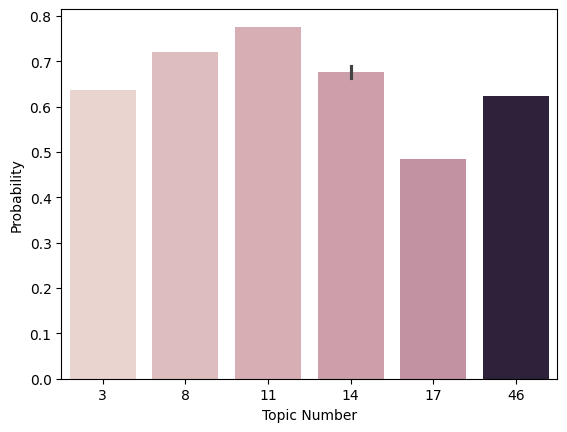

In [25]:
topic_df, viz_per_topic = locate_topics_probs('Microsoft_Nadella_2021.txt')

The below barplot gives the distribution of topics across this document with their respective probabilities

<Axes: xlabel='Topic Number', ylabel='Probability'>

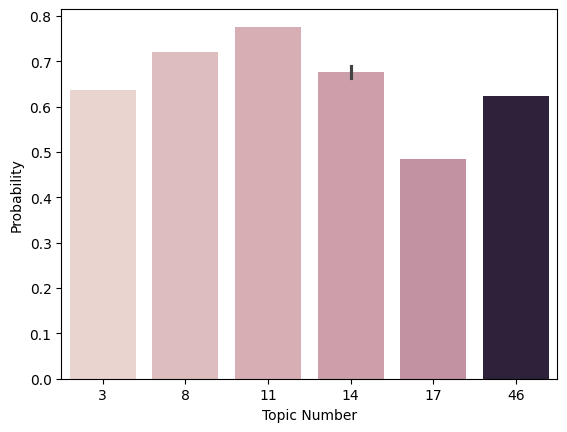

In [26]:
create_viz(topic_df)

We can see that **Topic 3, 8, 11, 14, 17 and 46** have been predicted by the model for the document: Microsoft_Nadella_2021.txt\
However, we also want to have a more clear visual or context of what these topics actually mean.\
Let's dig deeper on each topic!

In [27]:
viz_per_topic

Let us see now do a direct comparison of how our model has performed with respect to the actual contents of the file.

Quotes from the file per topic:

*   **Impact of the Pandemic (Topic 3):**

1.   "As I write this, people and organizations everywhere continue to struggle with the uncertainty of a pandemic that continues to cause so much suffering."
2.   "While the pandemic has been the defining issue of the past year-and-a-half, climate change is the challenge of our lifetime."

*   **Company Culture and Employee Engagement (Topic 8):**


1.   "Our culture will determine the lengths of what we will achieve. We aspire to create a culture where employees are encouraged to be curious, to experiment, and to share things they learn."
2.   "Diversity and inclusion continues to be a core priority for every employee at Microsoft and is incorporated into our performance and career development approach."


*   **Impact of COVID-19 on Access to Resources (Topic 11):**


1.   "The pandemic has underscored that without it (broadband), people lack access to education, healthcare, economic opportunity, and more."
2.   "We continue to make our technology affordable and accessible to nonprofit organizations around the world."




*   **Innovation and Ecosystem Growth (Topic 14):**


1.   "Our goal is to foster innovation that generates new ecosystems of inventors, partners, developers, creators, changemakers, public servants, frontline workers, and knowledge workers."
2.   "With Azure Mixed Reality Services, digital information can be represented within the context of the three-dimensional world we live in."


*   **Community Development and Access (Topic 17):**


1.  "We are continuing our efforts to extend broadband access to millions of people in rural and underserved communities in the United States and around the globe."
2.   "To build a more inclusive economy, we also have a responsibility to help close the Disability Divide, which impacts more than 1 billion people with disabilities around the world."


*   **Hybrid Work Environment and Collaboration(Topic 46):**


1.   "Our approach to hybrid work starts with Teams—the only all-in-one solution that supports meetings, calls, chat, collaboration, and business process automation in day-to-day workflow."
2.   "In this new hybrid work environment, having a digital employee experience platform will be key to business success."



BERTopic has effectively captured the essence of various themes such as the impact of the pandemic, company culture and employee engagement, the role of technology in community development, innovation and ecosystem growth, and the transition to a hybrid work environment.







**Case 2: DXC Technology: Mike Salvino
(2021)**

Input file provided is DXC Technology_Salvino_2021.txt
863


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:55:02,030 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:55:05,300 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:55:05,302 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:55:05,305 - BERTopic - Cluster - Completed ✓


864


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:55:05,394 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:55:07,698 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:55:07,700 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:55:07,704 - BERTopic - Cluster - Completed ✓


865


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:55:07,797 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:55:10,090 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:55:10,092 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:55:10,097 - BERTopic - Cluster - Completed ✓


866


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 19:55:10,191 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 19:55:13,319 - BERTopic - Dimensionality - Completed ✓
2024-05-01 19:55:13,321 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 19:55:13,325 - BERTopic - Cluster - Completed ✓


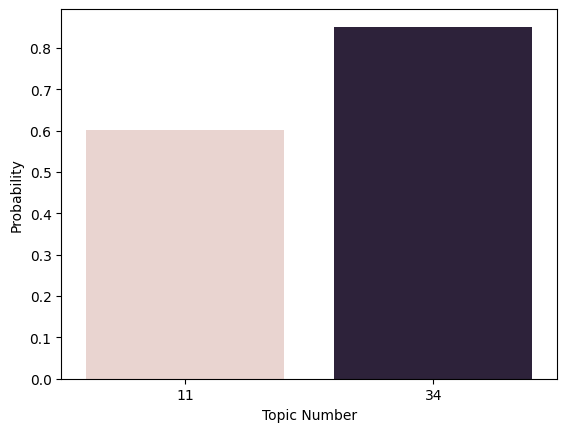

In [36]:
topic_df, viz_per_topic = locate_topics_probs('DXC Technology_Salvino_2021.txt')

**Topics: 11 and 34**

In [37]:
viz_per_topic

In **Mike Salvino's** letter to DXC customers and colleagues, the below topics are addressed:


*   **Impact of COVID-19 on Access to Resources (Topic 11):**


1.   "As the world witnesses the ongoing impact of the COVID-19 pandemic, our focus continues to be on our people."
2.   "At the beginning of the outbreak, we enabled 99% of our people worldwide to work virtually and opened a COVID-19 Command Center that still runs 24/7."



*   **Strategic Priorities and Growth (Topic 34):**


1.   "We have been running a structured playbook, which is our proven methodology for how we transform a company to deliver sustainable growth."
2.   "We are on the right trajectory...confident we will continue to deliver excellence for our customers and colleagues in FY22 and the longer term."

BERTopic was able to highlight topics related to COVID-19 and DXC's strategic priorities, which allowed for the extraction of key information about the company's response to the pandemic and its overall transformation journey.








###**Retail**

**Case 1: Walmart: Doug McMillon (2021)**

Input file provided is Walmart_McMillon_2021.txt
3144


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:31,976 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:34,402 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:34,405 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:34,408 - BERTopic - Cluster - Completed ✓


3145


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:34,519 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:38,259 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:38,265 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:38,271 - BERTopic - Cluster - Completed ✓


3146


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:38,414 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:41,230 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:41,233 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:41,236 - BERTopic - Cluster - Completed ✓


3147


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:41,330 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:44,101 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:44,103 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:44,108 - BERTopic - Cluster - Completed ✓


3148


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:44,209 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:47,498 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:47,499 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:47,504 - BERTopic - Cluster - Completed ✓


3149


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:47,617 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:50,744 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:50,746 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:50,751 - BERTopic - Cluster - Completed ✓


3150


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:50,857 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:53,849 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:53,851 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:53,856 - BERTopic - Cluster - Completed ✓


3151


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:53,965 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:56,699 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:56,703 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:56,706 - BERTopic - Cluster - Completed ✓


3152


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:56,797 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:05:59,153 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:05:59,156 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:05:59,159 - BERTopic - Cluster - Completed ✓


3153


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:05:59,263 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:06:03,816 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:06:03,819 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:06:03,824 - BERTopic - Cluster - Completed ✓


3154


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:06:03,933 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:06:07,294 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:06:07,296 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:06:07,303 - BERTopic - Cluster - Completed ✓


3155


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:06:07,363 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:06:09,745 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:06:09,746 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:06:09,751 - BERTopic - Cluster - Completed ✓


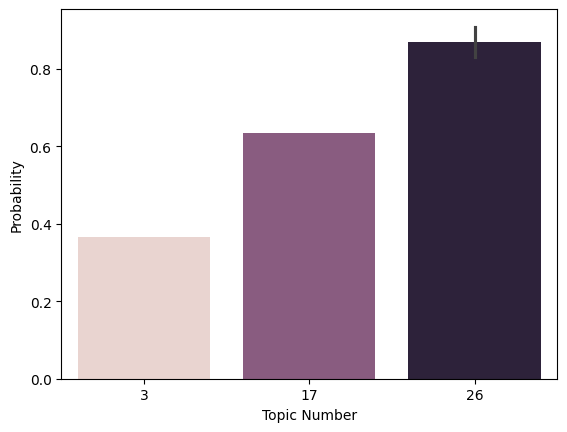

In [40]:
topic_df, viz_per_topic = locate_topics_probs('Walmart_McMillon_2021.txt')

<Axes: xlabel='Topic Number', ylabel='Probability'>

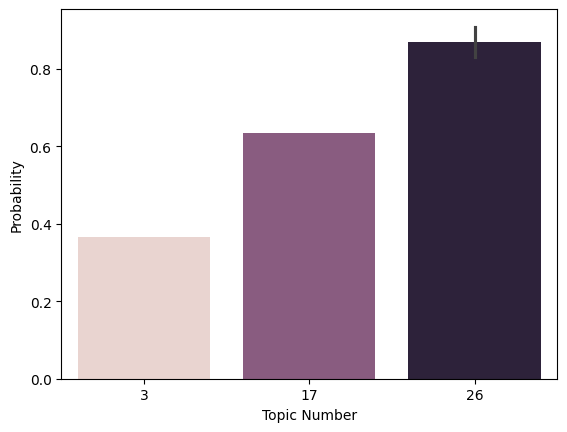

In [44]:
create_viz(topic_df)

**Topics: 3, 17 and 26**

In [45]:
viz_per_topic

Topics predicted for file Walmart_McMillon_2021.txt are 3, 17 and 26. Let's look closer.



*   **Pandemic Response and Crisis Management (Topic 3):**


1.   "Looking back at 2020 brings with it a wide range of thoughts and emotions as the world faces one of the most challenging times in modern history."
2.   "The pandemic brought extraordinary challenges, heartbreaking stories, significant loss and moments of inspiration..."


*   **Community Support and Social Responsibility (Topic 17):**


1.   "As I wrote this letter last year, uncertainty over the length and severity of the health crisis was at its peak."
2.   "Across the world in our stores, clubs and supply chain, they have come together to serve our customers, each other, and their communities."



*   **Customer Trust and Satisfaction (Topic 26):**


1.   "Our business model has evolved and will look different in the future than in the past."
2.   "Our associates serve customers and their communities in a way that’s simply incredible. That’s why so many customers trust Walmart."

Bertopic was able to highlight key themes related to pandemic management, community support, and customer engagement









**Case 2: Home Depot: Craig Menear (2021)**

Input file provided is Home Depot_Menear_2021.txt
1369


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:15,281 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:18,414 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:18,420 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:18,425 - BERTopic - Cluster - Completed ✓


1370


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:18,529 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:20,897 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:20,899 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:20,902 - BERTopic - Cluster - Completed ✓


1371


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:21,002 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:24,505 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:24,508 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:24,514 - BERTopic - Cluster - Completed ✓


1372


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:24,617 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:27,075 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:27,078 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:27,081 - BERTopic - Cluster - Completed ✓


1373


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:27,195 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:31,066 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:31,071 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:31,074 - BERTopic - Cluster - Completed ✓


1374


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:31,181 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:33,567 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:33,569 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:33,574 - BERTopic - Cluster - Completed ✓


1375


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:33,678 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:36,042 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:36,044 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:36,047 - BERTopic - Cluster - Completed ✓


1376


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:36,143 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:38,464 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:38,466 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:38,471 - BERTopic - Cluster - Completed ✓


1377


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:38,573 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:42,311 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:42,314 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:42,316 - BERTopic - Cluster - Completed ✓


1378


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:15:42,450 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:15:45,871 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:15:45,873 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:15:45,877 - BERTopic - Cluster - Completed ✓


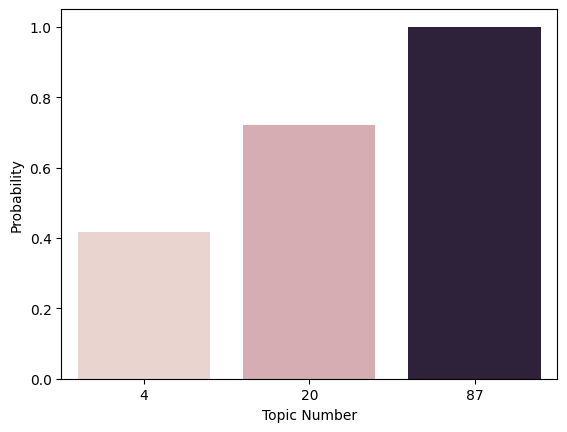

In [49]:
topic_df, viz_per_topic = locate_topics_probs('Home Depot_Menear_2021.txt')

**Topics: 4, 20 and 87**

In [50]:
viz_per_topic

**Craig Menear's** letter to shareholders from The Home Depot addresses several key topics:


*   **Dividend and Shareholder Returns(Topic 4):**


1.   "Our first principle is to reinvest in the business to drive growth faster than the market."
2.   "During Fiscal 2020, we remained committed to paying our quarterly dividend, returning approximately $6.5 billion to our shareholders in dividends."


*   **Online and Digital Strategy(Topic 20):**


1.   "Sales leveraging our digital platforms increased 86 percent versus the prior year."
2.   "Approximately 60 percent of online orders were fulfilled through the store, demonstrating the strength of our interconnected retail strategy."


*   **Pandemic Impact and Inflation(Topic 87):**


1.   "Fiscal 2020 was a year full of challenge and uncertainty as the world navigated the global pandemic."
2.   "We implemented changes in our stores, including reducing store hours, proactively limiting the number of customers, and eliminating certain traffic-driving events, all in response to the challenges posed by the pandemic."

Bertopic was able to highlight the challenges and successes of fiscal 2020, highlighting the company's resilience, strategic investments, and commitment to stakeholders. It also specifies about digitization of store for enhancing customer experience.

###**Airlines**

**Case 1: Southwest Airlines: Gary C. Kelly (2021)**

Input file provided is Southwest Airlines_Kelly_2021.txt
2745


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:40,109 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:26:44,497 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:26:44,502 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:26:44,505 - BERTopic - Cluster - Completed ✓


2746


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:44,614 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:26:47,905 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:26:47,907 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:26:47,910 - BERTopic - Cluster - Completed ✓


2747


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:48,001 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:26:50,292 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:26:50,294 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:26:50,297 - BERTopic - Cluster - Completed ✓


2748


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:50,392 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:26:54,353 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:26:54,357 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:26:54,362 - BERTopic - Cluster - Completed ✓


2749


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:54,478 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:26:57,837 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:26:57,843 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:26:57,845 - BERTopic - Cluster - Completed ✓


2750


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:26:57,958 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:01,548 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:01,550 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:01,556 - BERTopic - Cluster - Completed ✓


2751


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:01,659 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:04,010 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:04,012 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:04,016 - BERTopic - Cluster - Completed ✓


2752


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:04,124 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:06,479 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:06,481 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:06,485 - BERTopic - Cluster - Completed ✓


2753


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:06,589 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:08,970 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:08,972 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:08,979 - BERTopic - Cluster - Completed ✓


2754


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:09,067 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:13,151 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:13,154 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:13,156 - BERTopic - Cluster - Completed ✓


2755


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:13,252 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:16,409 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:16,411 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:16,414 - BERTopic - Cluster - Completed ✓


2756


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:16,514 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:18,893 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:18,895 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:18,900 - BERTopic - Cluster - Completed ✓


2757


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:18,997 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:21,327 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:21,329 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:21,337 - BERTopic - Cluster - Completed ✓


2758


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:21,437 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:23,766 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:23,768 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:23,771 - BERTopic - Cluster - Completed ✓


2759


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:23,878 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:26,707 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:26,709 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:26,711 - BERTopic - Cluster - Completed ✓


2760


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:26,833 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:30,884 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:30,886 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:30,889 - BERTopic - Cluster - Completed ✓


2761


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:30,993 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:33,400 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:33,402 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:33,405 - BERTopic - Cluster - Completed ✓


2762


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:33,510 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:35,897 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:35,899 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:35,902 - BERTopic - Cluster - Completed ✓


2763


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:27:35,997 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:27:38,361 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:27:38,363 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:27:38,366 - BERTopic - Cluster - Completed ✓


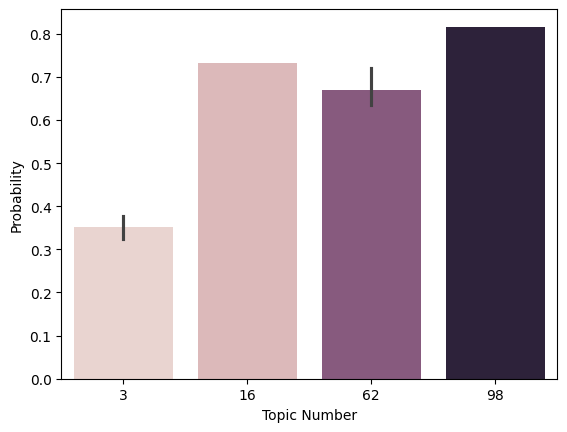

In [54]:
topic_df, viz_per_topic = locate_topics_probs('Southwest Airlines_Kelly_2021.txt')

**Topics: 3, 16, 62 and 8**

In [55]:
viz_per_topic

Here are quotes from **Gary C. Kelly's** letter to shareholders categorized by the identified topics:



*   **Navigating the Pandemic Crisis(Topic 3):**


1.   "It was just over a year ago that the novel coronavirus COVID-19 pandemic began to spread throughout the United States. It has been a long, painful year, and a great deal has transpired."
2.   "No one could have known for certain that, over a year later, we would still face a pandemic with tens of thousands of new cases daily, and a U.S. death toll well in excess of 500,000 lives."


*   **Prioritizing Safety for Employees(Topic 16):**


1.   "Our top priority is always the safety and well-being of our People and our Customers."
2.   "First, a number of health and safety protocols were swiftly enacted, many of which remain in place today."


*   **Recovering Travel Demand and Business(Topic 62):**


1.   "In plain terms, the pandemic led to a breathtaking plunge in travel, tourism, and hospitality sector revenues, leading to massive losses."
2.   "With very weak demand, average fares and passenger revenue yields (per revenue passenger mile, or RPMs) fell 8.6 percent and 10.6 percent, respectively."


*   **Modernizing Fleet with Boeing Partnership(Topic 98):**


1.   "After almost two years out of revenue service, the Boeing 737 MAX aircraft is, again, flying for Southwest."
2.   "We reached agreement with The Boeing Company (Boeing) to extend our order book through 2031, and selected the MAX 7 aircraft as the successor to the 737-700 model—reaching agreement on 100 firm orders for MAX 7 aircraft."

These quotes capture Kelly's discussion on the pandemic's impact, the company's response, employee support, business strategy, and the future of the travel industry, in alignment with the identified topics.









**Case 2: United Airlines: Scott Kirby (2021)**

Input file provided is United Airlines_Kirby_2021.txt
3023


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:29,685 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:32,422 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:32,424 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:32,427 - BERTopic - Cluster - Completed ✓


3024


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:32,488 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:35,840 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:35,842 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:35,847 - BERTopic - Cluster - Completed ✓


3025


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:35,941 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:38,335 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:38,338 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:38,341 - BERTopic - Cluster - Completed ✓


3026


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:38,434 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:41,818 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:41,821 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:41,825 - BERTopic - Cluster - Completed ✓


3027


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:41,944 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:44,654 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:44,656 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:44,659 - BERTopic - Cluster - Completed ✓


3028


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:44,751 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:47,067 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:47,070 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:47,074 - BERTopic - Cluster - Completed ✓


3029


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:47,175 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:49,498 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:49,500 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:49,503 - BERTopic - Cluster - Completed ✓


3030


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-01 20:41:49,551 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-01 20:41:52,962 - BERTopic - Dimensionality - Completed ✓
2024-05-01 20:41:52,967 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-01 20:41:52,969 - BERTopic - Cluster - Completed ✓


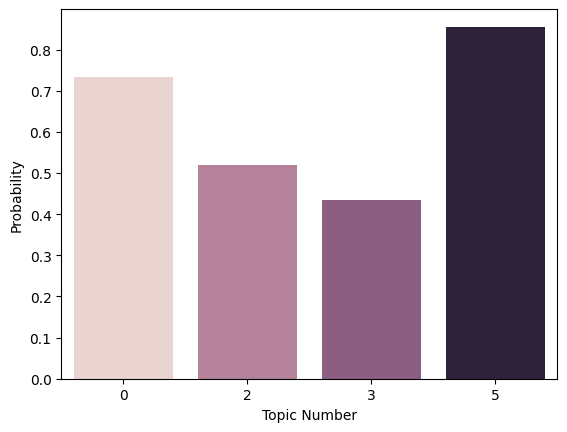

In [60]:
topic_df, viz_per_topic = locate_topics_probs('United Airlines_Kirby_2021.txt')

**Topics: 0, 2, 3 and 5**

In [65]:
freq_2021.iloc[6]

Topic                                                                  5
Count                                                                 38
Name                                        5_capital_blue_orange_return
Representation         [capital, blue, orange, return, securities, we...
Representative_Docs    [As we stated earlier, our publicly traded equ...
Name: 6, dtype: object

In [61]:
viz_per_topic

Here are quotes from **Scott Kirby's** letter to shareholders categorized by the identified topics:



*   **Leadership and Governance(Topic 0):**


1.   "Hope was never our strategy...the best collection of airline professionals in the business confronted the crisis head-on."
2.   "Thank you for your continued support of United."


*   **Diversity, Equity, and Inclusion(Topic 2):**


1.   "In 2020, we increased transparency and accountability...achieved and are committed to maintaining near perfect pay equity for employees of all genders and races."
2.   "United is committed to building a more diverse, equitable and inclusive workplace and world."

*   **Pandemic Response(Topic 3):**


1.   "By April 2020, the world essentially shut down, and our revenues plummeted 99%."
2.   "During the crisis, we doubled-down on customer service, led the industry in cleaning and safety, and permanently got rid of change fees."

*    **Financial Strategy(Topic 5):**


1.   "Given the amount of debt we have taken on, it will take time to restore the balance sheet, and we will have to be thoughtful when it comes to paying down debt versus making investments."
2.   "We have learned how to run a smarter, more efficient operation and developed some really good habits regarding cost discipline."






These quotes capture Kirby's discussion on the pandemic's impact, United's response, and their commitment to diversity and inclusion, in alignment with the identified topics.





##Final Thoughts



*   **Information Technology**: Both Microsoft and DXC Technology focus on customer-centricity, innovation, response to the pandemic, employee well-being, and financial performance. They emphasize their commitment to delivering excellence for customers, driving innovation to achieve growth, supporting employees during the pandemic, and achieving stable financial results. Despite operating in different industries, both companies share common values and priorities, highlighting their dedication to meeting customer needs, fostering innovation, supporting employees, and maintaining financial stability.

*   **Retail**: Both Walmart and Home Depot emphasize their responses to the COVID-19 pandemic, including measures taken to ensure the safety and well-being of their employees and customers. They also highlight their financial performance during the challenging period, showcasing resilience and adaptability in the face of unprecedented circumstances. Additionally, both companies underscore their commitment to providing essential products and services to communities while also investing in digital innovation to enhance the customer experience. Overall, both letters reflect a focus on navigating the pandemic, supporting stakeholders, and driving growth in a rapidly changing retail landscape.

*   **Airlines**: Both Southwest Airlines and United Airlines acknowledge the severe impact of COVID-19 on the aviation industry. They discuss measures taken to ensure safety, reduce costs, and adapt operations. Both emphasize innovation and forward-thinking strategies to navigate the crisis and prepare for the future, including improvements in customer service, investment in digital technology, and commitments to environmental sustainability and diversity.

**BERTopic** has helped uncover these common trends by clustering similar passages of text into coherent topics, providing valuable insights into the strategic priorities and challenges faced by these companies during the unprecedented events of the past year.










##Coherence Score

 Coherence score is a valuable metric for assessing the quality and interpretability of topics generated by BERTopic. It provides quantitative insights that complement qualitative analysis, helping users make informed decisions in topic modeling tasks.\
 The coherence score typically ranges between 0 and 1, where higher values indicate more coherent and interpretable topics.\
 While this score indicates a reasonable level of topic quality, human analysis and domain knowledge should be used to evaluate the effectiveness of a model

In [99]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(model, dataframe):
  cv = model_2020.vectorizer_model
  X = cv.fit_transform(dataframe["text"])
  doc_tokens = [text.split(" ") for text in dataframe["text"]]


  id2word = corpora.Dictionary(doc_tokens)
  texts = doc_tokens
  corpus = [id2word.doc2bow(text) for text in texts]

  topic_words = []
  for i in range(len(model.get_topic_freq())-1):
    interim = []
    interim = [t[0] for t in model.get_topic(i)]
    topic_words.append(interim)



  coherence_model = CoherenceModel(topics=topic_words, texts=texts, corpus=corpus, dictionary=id2word, coherence='c_v')
  coherence=coherence_model.get_coherence()
  return coherence

In [102]:
coherence_score = calculate_coherence_score(model, df)
coherence_score

0.5016615377521377

In [101]:
coherence_score_2021 = calculate_coherence_score(model_2021, df_2021)
coherence_score_2021

0.48608212314834504

In [103]:
coherence_score_2020 = calculate_coherence_score(model_2020, df_2020)
coherence_score_2020

0.4993398923478225